# Carga y Análisis Exploratorio de Datos (EDA) 📈

### 📊 Importando librerías y datos

Se importan las librerías esenciales para el análisis de datos y visualización: `pandas` y `matplotlib.pyplot`. También se cargan los dataframes correspondientes a los años 2015 a 2019 desde archivos CSV. ¡Vamos a sumergirnos en los datos! 📈


In [1]:
from CSV import df_2015, df_2016, df_2017, df_2018, df_2019, output_path, file_path, model_filename, output_csv_path
import csv 
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from kafka import KafkaConsumer
from kafka import KafkaProducer
from scipy.stats import randint
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
import pickle



### 📐 Analizando dimensiones de los DataFrames

Creamos un diccionario para almacenar las dimensiones (filas y columnas) de cada DataFrame desde 2015 hasta 2019. Luego, imprimimos estas dimensiones para tener una visión clara del tamaño de nuestros datos en cada año. ¡Veamos cuántos datos tenemos! 📂


In [2]:
# Crear un diccionario para almacenar las dimensiones de cada DataFrame
dimensions = {
    '2015': df_2015.shape,
    '2016': df_2016.shape,
    '2017': df_2017.shape,
    '2018': df_2018.shape,
    '2019': df_2019.shape,
}

# Imprimir las dimensiones de cada DataFrame
for year, shape in dimensions.items():
    print(f"Archivo {year}.csv - Filas: {shape[0]}, Columnas: {shape[1]}")


Archivo 2015.csv - Filas: 158, Columnas: 12
Archivo 2016.csv - Filas: 157, Columnas: 13
Archivo 2017.csv - Filas: 155, Columnas: 12
Archivo 2018.csv - Filas: 156, Columnas: 9
Archivo 2019.csv - Filas: 156, Columnas: 9


### 🔍 Contando duplicados en los DataFrames

Definimos una función para contar las filas duplicadas en un DataFrame. Usamos esta función para cada uno de los DataFrames de los años 2015 a 2019. Finalmente, imprimimos la cantidad de duplicados en cada archivo para identificar posibles problemas de datos repetidos. ¡Vamos a limpiar nuestros datos! 🧹


In [3]:
# Función para contar duplicados
def count_duplicates(df):
    return df.duplicated().sum()

# Contar duplicados en cada DataFrame
duplicates_2015 = count_duplicates(df_2015)
duplicates_2016 = count_duplicates(df_2016)
duplicates_2017 = count_duplicates(df_2017)
duplicates_2018 = count_duplicates(df_2018)
duplicates_2019 = count_duplicates(df_2019)

# Imprimir la cantidad de duplicados en cada archivo
print(f'Duplicados en 2015: {duplicates_2015}')
print(f'Duplicados en 2016: {duplicates_2016}')
print(f'Duplicados en 2017: {duplicates_2017}')
print(f'Duplicados en 2018: {duplicates_2018}')
print(f'Duplicados en 2019: {duplicates_2019}')


Duplicados en 2015: 0
Duplicados en 2016: 0
Duplicados en 2017: 0
Duplicados en 2018: 0
Duplicados en 2019: 0


### 📜 Resumen de los conjuntos de datos

Definimos una función para extraer un resumen detallado de un DataFrame. Este resumen incluye el número de filas y columnas, las columnas presentes, los tipos de datos, la cantidad de valores nulos por columna y una descripción estadística completa. Aplicamos esta función a los DataFrames de los años 2015 a 2019 y mostramos los resultados para obtener una visión completa de nuestros datos. ¡Hora de entender nuestros datos en profundidad! 🧠


In [4]:
# Función para extraer un resumen del conjunto de datos
def summary_dataset(df):
    summary = {
        'Número de Filas': df.shape[0],
        'Número de Columnas': df.shape[1],
        'Columnas': df.columns.tolist(),
        'Tipos de Datos': df.dtypes.to_dict(),
        'Número de Valores Nulos por Columna': df.isnull().sum().to_dict(),
        'Descripción Estadística': df.describe(include='all').to_dict()
    }
    return summary

# Obtener el resumen de cada DataFrame
summary_2015 = summary_dataset(df_2015)
summary_2016 = summary_dataset(df_2016)
summary_2017 = summary_dataset(df_2017)
summary_2018 = summary_dataset(df_2018)
summary_2019 = summary_dataset(df_2019)

# Imprimir el resumen de cada DataFrame
for year, summary in zip(['2015', '2016', '2017', '2018', '2019'], 
                         [summary_2015, summary_2016, summary_2017, summary_2018, summary_2019]):
    print(f"Resumen del archivo {year}.csv:")
    print(f"Número de Filas: {summary['Número de Filas']}")
    print(f"Número de Columnas: {summary['Número de Columnas']}")
    print(f"Columnas: {summary['Columnas']}")
    print(f"Tipos de Datos: {summary['Tipos de Datos']}")
    print(f"Número de Valores Nulos por Columna: {summary['Número de Valores Nulos por Columna']}")
    print(f"Descripción Estadística: {summary['Descripción Estadística']}\n")


Resumen del archivo 2015.csv:
Número de Filas: 158
Número de Columnas: 12
Columnas: ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']
Tipos de Datos: {'Country': dtype('O'), 'Region': dtype('O'), 'Happiness Rank': dtype('int64'), 'Happiness Score': dtype('float64'), 'Standard Error': dtype('float64'), 'Economy (GDP per Capita)': dtype('float64'), 'Family': dtype('float64'), 'Health (Life Expectancy)': dtype('float64'), 'Freedom': dtype('float64'), 'Trust (Government Corruption)': dtype('float64'), 'Generosity': dtype('float64'), 'Dystopia Residual': dtype('float64')}
Número de Valores Nulos por Columna: {'Country': 0, 'Region': 0, 'Happiness Rank': 0, 'Happiness Score': 0, 'Standard Error': 0, 'Economy (GDP per Capita)': 0, 'Family': 0, 'Health (Life Expectancy)': 0, 'Freedom': 0, 'Trust (Government Corruption)': 0, 

### 🔍 Comparando nombres de columnas

Definimos una función para comparar los nombres de las columnas entre varios DataFrames. Esta función imprime las columnas presentes en cada DataFrame, las columnas comunes a todos los DataFrames y las columnas presentes en al menos uno de ellos. Aplicamos esta función a los DataFrames de los años 2015 a 2019 para identificar similitudes y diferencias en la estructura de nuestros datos. ¡Vamos a ver qué columnas se mantienen constantes y cuáles varían! 🔄


In [5]:
# Función para comparar los nombres de las columnas
def compare_column_names(*dataframes):
    column_sets = [set(df.columns) for df in dataframes]
    for i, column_set in enumerate(column_sets):
        print(f"Columnas del DataFrame {i+1}: {column_set}")

    common_columns = set.intersection(*column_sets)
    all_columns = set.union(*column_sets)

    print("\nColumnas comunes en todos los DataFrames:")
    print(common_columns)

    print("\nColumnas presentes en al menos uno de los DataFrames:")
    print(all_columns)

# Comparar los nombres de las columnas
compare_column_names(df_2015, df_2016, df_2017, df_2018, df_2019)


Columnas del DataFrame 1: {'Region', 'Standard Error', 'Happiness Score', 'Family', 'Happiness Rank', 'Freedom', 'Health (Life Expectancy)', 'Economy (GDP per Capita)', 'Dystopia Residual', 'Generosity', 'Trust (Government Corruption)', 'Country'}
Columnas del DataFrame 2: {'Region', 'Happiness Score', 'Family', 'Happiness Rank', 'Upper Confidence Interval', 'Freedom', 'Lower Confidence Interval', 'Health (Life Expectancy)', 'Economy (GDP per Capita)', 'Dystopia Residual', 'Generosity', 'Trust (Government Corruption)', 'Country'}
Columnas del DataFrame 3: {'Trust..Government.Corruption.', 'Family', 'Health..Life.Expectancy.', 'Whisker.high', 'Freedom', 'Dystopia.Residual', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Generosity', 'Happiness.Score', 'Happiness.Rank', 'Country'}
Columnas del DataFrame 4: {'Country or region', 'Healthy life expectancy', 'Freedom to make life choices', 'Social support', 'Overall rank', 'Score', 'GDP per capita', 'Perceptions of corruption', 'Generosity'}
Co

### 📋 Comparación de nombres de columnas por año

Creamos un DataFrame que compara los nombres de las columnas presentes en cada DataFrame desde 2015 hasta 2019. Este nuevo DataFrame contiene todas las columnas encontradas y marca con una 'X' las columnas presentes en cada año. De esta manera, podemos visualizar fácilmente qué columnas se mantienen constantes y cuáles varían a lo largo del tiempo. ¡Visualicemos la estructura de nuestros datos! 🗂️


In [6]:
# Crear un DataFrame con los nombres de las columnas y los años
column_sets = {
    '2015': set(df_2015.columns),
    '2016': set(df_2016.columns),
    '2017': set(df_2017.columns),
    '2018': set(df_2018.columns),
    '2019': set(df_2019.columns),
}

all_columns = sorted(set.union(*column_sets.values()))
rows = []

for column in all_columns:
    row = {'Column Names': column}
    for year, columns in column_sets.items():
        row[year] = 'X' if column in columns else ''
    rows.append(row)

comparison_df = pd.DataFrame(rows, columns=['Column Names'] + list(column_sets.keys()))

# Reemplazar los valores NaN con espacios en blanco
comparison_df = comparison_df.fillna('')

# Imprimir el DataFrame en forma tabular
print(comparison_df.to_string(index=False))


                 Column Names 2015 2016 2017 2018 2019
                      Country    X    X    X          
            Country or region                   X    X
            Dystopia Residual    X    X               
            Dystopia.Residual              X          
     Economy (GDP per Capita)    X    X               
     Economy..GDP.per.Capita.              X          
                       Family    X    X    X          
                      Freedom    X    X    X          
 Freedom to make life choices                   X    X
               GDP per capita                   X    X
                   Generosity    X    X    X    X    X
               Happiness Rank    X    X               
              Happiness Score    X    X               
               Happiness.Rank              X          
              Happiness.Score              X          
     Health (Life Expectancy)    X    X               
     Health..Life.Expectancy.              X          
      Heal

### 🔄 Normalización y comparación de nombres de columnas

Definimos funciones para normalizar los nombres de las columnas y asegurar la consistencia en todos los DataFrames de 2015 a 2019. Se reemplazan nombres complejos o inconsistentes por nombres estandarizados. Luego, comparamos los nombres de las columnas normalizadas, creando un DataFrame que muestra la presencia de cada columna en cada año. Finalmente, combinamos todos los DataFrames en uno solo y lo guardamos en un archivo CSV, manejando posibles errores durante el proceso. ¡Vamos a unificar nuestros datos! 🔄📁


In [7]:
# Función para normalizar los nombres de las columnas
def normalize_column_name(name):
    name = name.lower().replace(' ', '_').replace('.', '').replace('(', '').replace(')', '')
    replacements = {
        'economy_gdp_per_capita': 'gdp_per_capita',
        'dystopia_residual': 'dystopia_residual',
        'dystopiaresidual': 'dystopia_residual',
        'economygdppercapita': 'gdp_per_capita',
        'health_life_expectancy': 'life_expectancy',
        'healthlifeexpectancy': 'life_expectancy',
        'healthy_life_expectancy': 'life_expectancy',
        'trust_government_corruption': 'government_corruption',
        'trustgovernmentcorruption': 'government_corruption',
        'happiness_score': 'score',
        'happinessscore': 'score',
        'happiness_rank': 'rank',
        'happinessrank': 'rank',
        'country_or_region': 'country',
        'country': 'country',
        'overall_rank': 'rank',
        'score': 'score',
        'gdp_per_capita': 'gdp_per_capita',
        'social_support': 'social_support',
        'healthy_life_expectancy': 'life_expectancy',
        'freedom_to_make_life_choices': 'freedom',
        'generosity': 'generosity',
        'perceptions_of_corruption': 'government_corruption'
    }
    return replacements.get(name, name)

# Función para normalizar los nombres de las columnas en todos los DataFrames
def normalize_column_names(dfs):
    all_columns = set()
    for df in dfs.values():
        df.columns = [normalize_column_name(col) for col in df.columns]
        all_columns.update(df.columns)
    
    all_columns = sorted(all_columns)
    
    for year, df in dfs.items():
        for col in all_columns:
            if col not in df.columns:
                df[col] = None
        dfs[year] = df.loc[:, all_columns]
    
    return dfs

# Función para comparar los nombres de las columnas
def compare_column_names(dfs):
    column_sets = {year: set(df.columns) for year, df in dfs.items()}
    all_columns = sorted(set.union(*column_sets.values()))
    rows = []

    for column in all_columns:
        row = {'Column Names': column}
        for year, columns in column_sets.items():
            row[year] = 'X' if column in columns else ''
        rows.append(row)

    comparison_df = pd.DataFrame(rows, columns=['Column Names'] + list(column_sets.keys()))
    return comparison_df.fillna('')

# Crear un diccionario con los DataFrames
dfs = {
    '2015': df_2015,
    '2016': df_2016,
    '2017': df_2017,
    '2018': df_2018,
    '2019': df_2019
}

# Normalizar los nombres de las columnas
normalized_dfs = normalize_column_names(dfs)

# Comparar los nombres de las columnas
comparison_df = compare_column_names(normalized_dfs)

# Restablecer los índices de los DataFrames normalizados y asegurarse de que los índices sean únicos
for year in normalized_dfs:
    normalized_dfs[year].reset_index(drop=True, inplace=True)

# Combinar los DataFrames en uno solo
combined_df = pd.concat(normalized_dfs.values(), ignore_index=True)

# Intento de guardar el DataFrame combinado en un archivo CSV
try:
    combined_df.to_csv(output_path, index=False)
    print("Archivo guardado correctamente en:", output_path)
except Exception as e:
    print("Error al guardar el archivo:", e)

# Imprimir el DataFrame de comparación en forma tabular
print(comparison_df.to_string(index=False))

Archivo guardado correctamente en: C:\Users\cesar\Desktop\platzi\ETL_Workshop_03\DATA_CSV\combined_happiness_data.csv
             Column Names 2015 2016 2017 2018 2019
                  country    X    X    X    X    X
        dystopia_residual    X    X    X    X    X
                   family    X    X    X    X    X
                  freedom    X    X    X    X    X
           gdp_per_capita    X    X    X    X    X
               generosity    X    X    X    X    X
    government_corruption    X    X    X    X    X
          life_expectancy    X    X    X    X    X
lower_confidence_interval    X    X    X    X    X
                     rank    X    X    X    X    X
                   region    X    X    X    X    X
                    score    X    X    X    X    X
           social_support    X    X    X    X    X
           standard_error    X    X    X    X    X
upper_confidence_interval    X    X    X    X    X
              whiskerhigh    X    X    X    X    X
               

C:\Users\cesar\AppData\Local\Temp\ipykernel_311076\2118213096.py:83: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat(normalized_dfs.values(), ignore_index=True)


### Descripción General del Archivo de Datos de Felicidad

El archivo contiene información detallada sobre la felicidad en diferentes países, incluyendo varios indicadores económicos, sociales y políticos que influyen en la percepción de felicidad de los ciudadanos. A continuación, se describen las columnas presentes en el archivo:

- **country 🌍**: El nombre del país. *Tipo de datos: string*
- **dystopia_residual 😖**: Valor residual que refleja las circunstancias insatisfactorias del país. *Tipo de datos: float*
- **family 👨‍👩‍👧‍👦**: Estima el apoyo familiar percibido. *Tipo de datos: float*
- **freedom 🕊️**: Libertad de los individuos para tomar decisiones personales. *Tipo de datos: float*
- **gdp_per_capita 💵**: Producto Interno Bruto per cápita, un indicador de la prosperidad económica. *Tipo de datos: float*
- **generosity 🤲**: Nivel de generosidad medido en la sociedad. *Tipo de datos: float*
- **government_corruption 🏛️**: Percepción de la corrupción en el gobierno. *Tipo de datos: float*
- **life_expectancy 🏥**: Expectativa de vida en condiciones saludables. *Tipo de datos: float*
- **lower_confidence_interval 🔽**: Límite inferior del intervalo de confianza para la clasificación de la felicidad. *Tipo de datos: float*
- **rank 🏆**: Clasificación del país según el índice de felicidad. *Tipo de datos: int*
- **region 🌐**: Región geográfica a la que pertenece el país. *Tipo de datos: string*
- **score 📊**: Puntuación total de felicidad basada en diversos factores. *Tipo de datos: float*
- **social_support 🤝**: Apoyo social percibido en la comunidad. *Tipo de datos: float*
- **standard_error ⚠️**: Error estándar de la medición de la felicidad. *Tipo de datos: float*
- **upper_confidence_interval 🔼**: Límite superior del intervalo de confianza para la clasificación de la felicidad. *Tipo de datos: float*
- **whiskerhigh ➖**: Extremo superior del "bigote" en los diagramas de caja que muestra variabilidad en los datos. *Tipo de datos: float*
- **whiskerlow ➖**: Extremo inferior del "bigote" en los diagramas de caja. *Tipo de datos: float*

Cada columna proporciona un indicador específico que ayuda a comprender mejor qué factores contribuyen a la felicidad general de la población en diferentes países.

## 📊 combined_happiness_data

Ahora trabajaremos con el archivo de datos de felicidad normalizado y combinado, que contiene la información consolidada de los años 2015 a 2019. Este archivo facilita el análisis y la visualización de tendencias a lo largo del tiempo, proporcionando una base sólida para nuestras futuras investigaciones y análisis. ¡Empecemos a explorar estos datos unificados! 🌐


### 📥 Lectura del archivo CSV combinado

Leemos el archivo CSV combinado que contiene los datos normalizados de felicidad de 2015 a 2019. Luego, mostramos las primeras filas del archivo para obtener una vista preliminar de los datos. ¡Vamos a ver qué información tenemos! 📋


In [8]:
# Leer el archivo CSV
data = pd.read_csv(file_path)

# Mostrar las primeras filas del archivo
print(data.head())


       country  dystopia_residual   family  freedom  gdp_per_capita  \
0  Switzerland            2.51738  1.34951  0.66557         1.39651   
1      Iceland            2.70201  1.40223  0.62877         1.30232   
2      Denmark            2.49204  1.36058  0.64938         1.32548   
3       Norway            2.46531  1.33095  0.66973         1.45900   
4       Canada            2.45176  1.32261  0.63297         1.32629   

   generosity  government_corruption  life_expectancy  \
0     0.29678                0.41978          0.94143   
1     0.43630                0.14145          0.94784   
2     0.34139                0.48357          0.87464   
3     0.34699                0.36503          0.88521   
4     0.45811                0.32957          0.90563   

   lower_confidence_interval  rank          region  score  social_support  \
0                        NaN     1  Western Europe  7.587             NaN   
1                        NaN     2  Western Europe  7.561             NaN   

### 📥 Lectura y análisis preliminar del archivo CSV

Leemos el archivo CSV combinado que contiene los datos normalizados de felicidad de 2015 a 2019. Luego, obtenemos y mostramos la cantidad de filas y columnas del archivo para tener una idea del tamaño del conjunto de datos. ¡Vamos a ver cuántos datos tenemos para analizar! 📊


In [9]:
# Leer el archivo CSV
data = pd.read_csv(file_path)

# Obtener la cantidad de filas y columnas
num_filas, num_columnas = data.shape

# Mostrar la cantidad de filas y columnas
print(f"Cantidad de filas: {num_filas}")
print(f"Cantidad de columnas: {num_columnas}")


Cantidad de filas: 782
Cantidad de columnas: 17


### 📊 Resumen del conjunto de datos combinado

Definimos una función que imprime un resumen del DataFrame, mostrando los tipos de datos de cada columna y las estadísticas descriptivas transpuestas. Leemos el archivo CSV combinado y llamamos a esta función para obtener una visión detallada de nuestros datos. ¡Vamos a explorar las características y estadísticas de nuestro conjunto de datos! 📈


In [10]:
def summary_dataset(df):
    # Mostrar los tipos de datos de cada columna
    print("Tipos de datos de cada columna:")
    print(df.dtypes)
    print("\n")

    # Mostrar las estadísticas descriptivas transpuestas
    print("Estadísticas descriptivas (transpuestas):")
    print(df.describe().T)

# Ruta del archivo CSV
file_path = output_path

# Leer el archivo CSV
concatenated_df = pd.read_csv(file_path)

# Llamar a la función summary_dataset
summary_dataset(concatenated_df)



Tipos de datos de cada columna:
country                       object
dystopia_residual            float64
family                       float64
freedom                      float64
gdp_per_capita               float64
generosity                   float64
government_corruption        float64
life_expectancy              float64
lower_confidence_interval    float64
rank                           int64
region                        object
score                        float64
social_support               float64
standard_error               float64
upper_confidence_interval    float64
whiskerhigh                  float64
whiskerlow                   float64
dtype: object


Estadísticas descriptivas (transpuestas):
                           count       mean        std       min        25%  \
dystopia_residual          470.0   2.092717   0.565772  0.328580   1.737975   
family                     470.0   0.990347   0.318707  0.000000   0.793000   
freedom                    782.0   0.411091 

### 📊 Análisis de la distribución de variables clave

Seleccionamos columnas específicas del DataFrame que son de interés para el análisis: `Freedom`, `Economy`, `Trust`, `Happiness Score`, `Health`, y `Generosity`. Para cada una de estas columnas, trazamos histogramas que muestran la distribución de los datos. Además, calculamos y mostramos estadísticas clave como la media, la mediana y la desviación estándar en los gráficos. Utilizamos un estilo mejorado para los gráficos y añadimos líneas de la media para una visualización más clara. ¡Exploremos la distribución de estas variables importantes! 📉📈


C:\Users\cesar\AppData\Local\Temp\ipykernel_311076\864024710.py:44: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=0.5)


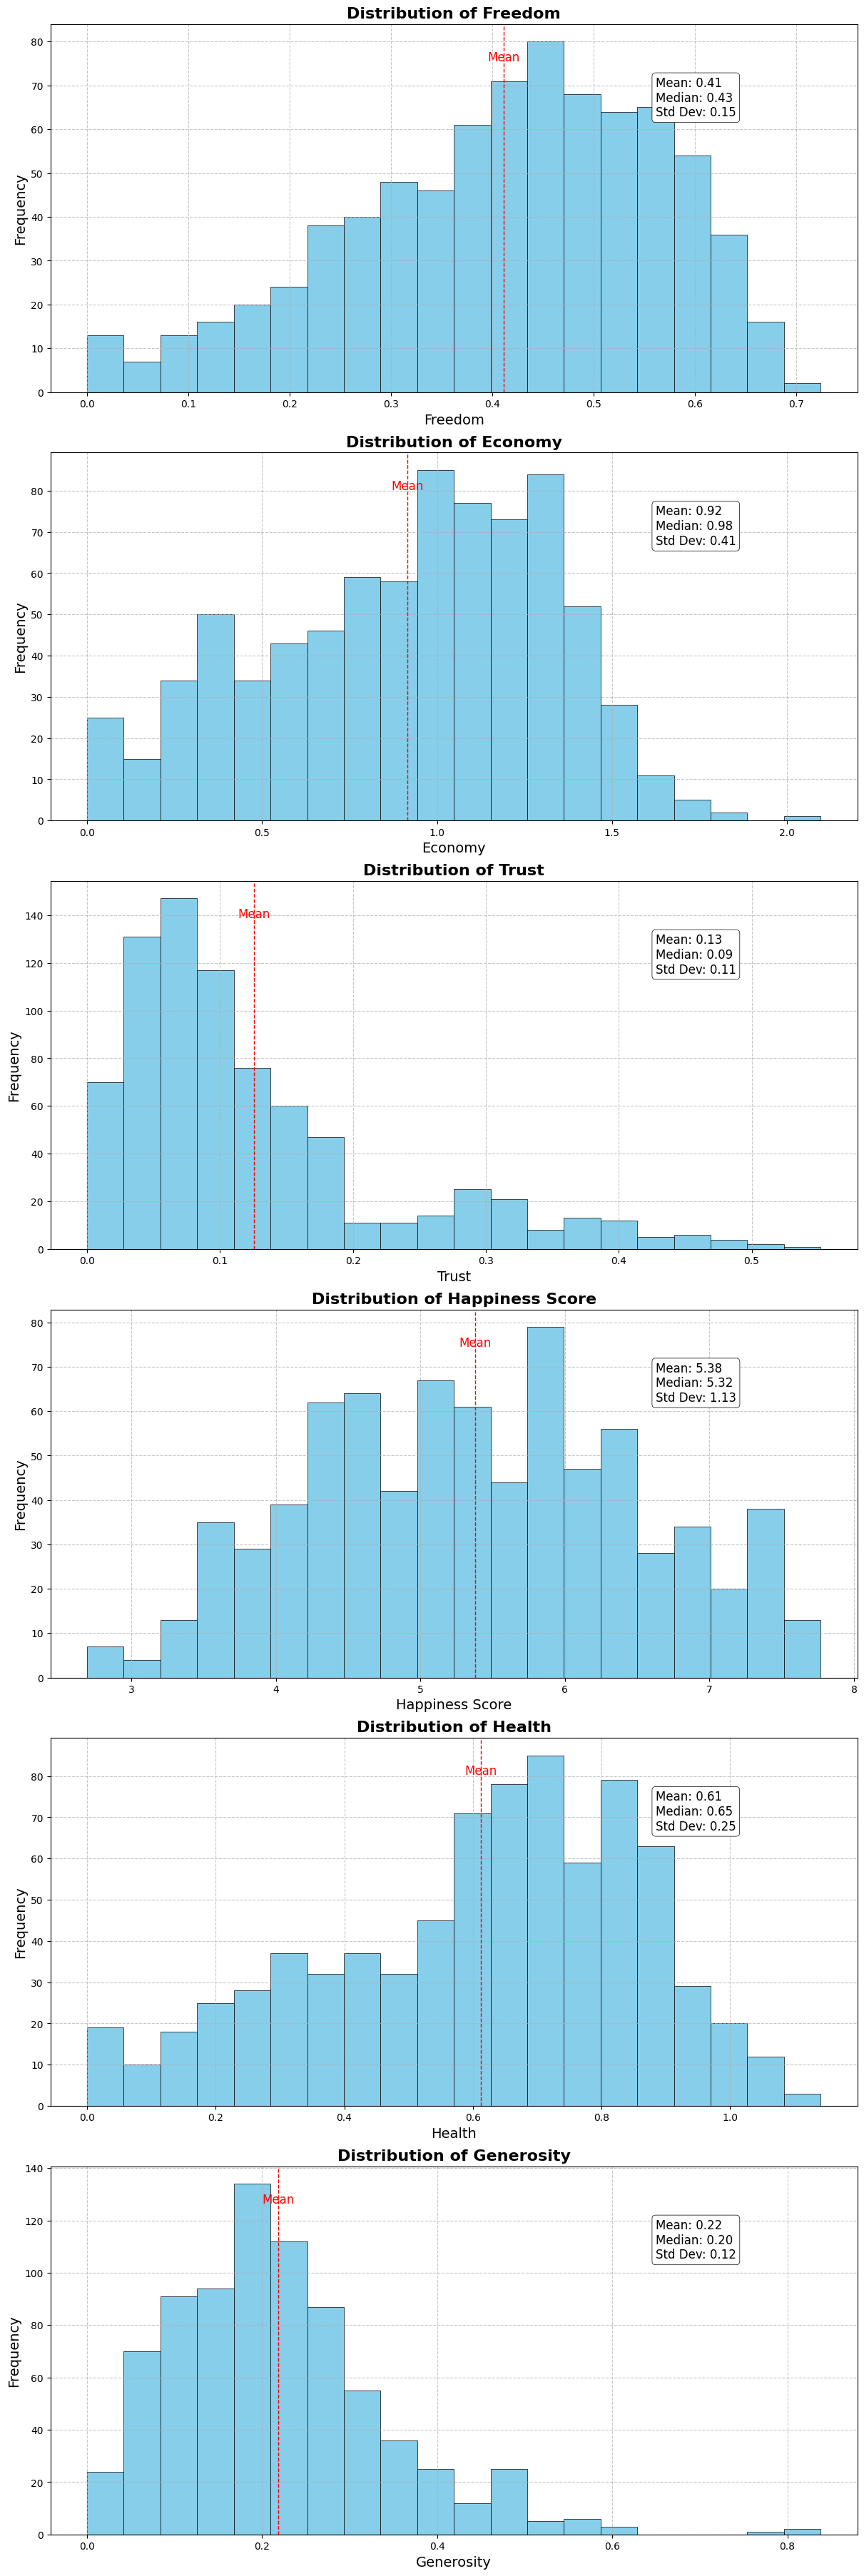

In [11]:
df = pd.read_csv(file_path)

# Seleccionar las columnas específicas
columns_of_interest = {
    'freedom': 'Freedom',
    'gdp_per_capita': 'Economy',
    'government_corruption': 'Trust',
    'score': 'Happiness Score',
    'life_expectancy': 'Health',
    'generosity': 'Generosity'
}

# Crear subplots
fig, axes = plt.subplots(nrows=len(columns_of_interest), ncols=1, figsize=(12, 6 * len(columns_of_interest)), constrained_layout=True)

# Mejorar el diseño y estilo
plt.style.use('ggplot')

# Trazar histogramas para cada columna seleccionada
for i, (column, display_name) in enumerate(columns_of_interest.items()):
    ax = axes[i]
    data = df[column].dropna()
    ax.hist(data, bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribution of {display_name}', fontsize=16, fontweight='bold')
    ax.set_xlabel(display_name, fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Calcular estadísticas adicionales
    mean = data.mean()
    median = data.median()
    std = data.std()
    
    # Mostrar estadísticas en el gráfico
    stats_text = f'Mean: {mean:.2f}\nMedian: {median:.2f}\nStd Dev: {std:.2f}'
    ax.annotate(stats_text, xy=(0.75, 0.75), xycoords='axes fraction', fontsize=12,
                bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))
    
    # Mostrar línea de la media
    ax.axvline(mean, color='red', linestyle='dashed', linewidth=1)
    ax.text(mean, ax.get_ylim()[1]*0.9, 'Mean', color='red', fontsize=12, ha='center')

# Ajustar el espacio entre subplots
plt.subplots_adjust(hspace=0.5)

# Mostrar los histogramas
plt.show()


### 🌍 Promedio de felicidad por región

Agrupamos los datos por región y calculamos el promedio del puntaje de felicidad para cada una. Luego, visualizamos estos promedios en un gráfico de barras, mostrando claramente qué regiones tienen los puntajes de felicidad más altos. Mejoramos la legibilidad del gráfico con etiquetas y una rejilla estilizada. ¡Vamos a ver cómo varía la felicidad alrededor del mundo! 🗺️😊


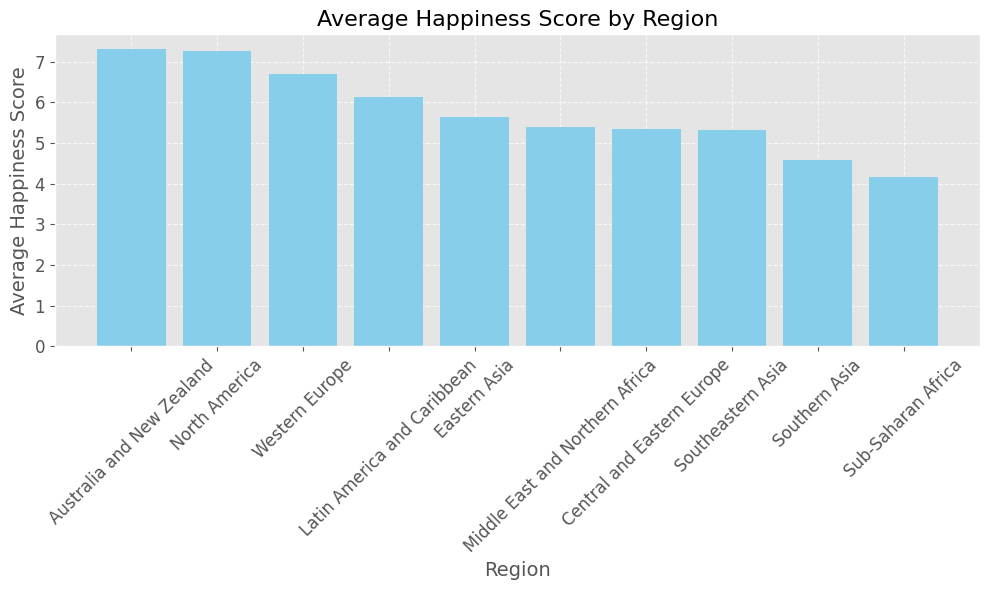

In [12]:
happiness_by_region = df.groupby('region')['score'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(happiness_by_region.index, happiness_by_region.values, color='skyblue')
plt.title('Average Happiness Score by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Average Happiness Score', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 📊 Preparación y análisis de datos para visualización

Leemos el archivo CSV combinado y mostramos las primeras filas y nombres de columnas para revisar su contenido. Creamos variables dummy para la columna 'region' si está presente y eliminamos columnas específicas como 'country' y 'overall_rank' si existen. Luego, seleccionamos variables clave para graficar y, si hay suficientes, creamos gráficos de dispersión para analizar las relaciones entre el puntaje de felicidad y otras variables como `gdp_per_capita`, `life_expectancy` y `freedom`. ¡Analicemos estas relaciones visualmente! 📉🌐


Columnas disponibles en el archivo:
Index(['country', 'dystopia_residual', 'family', 'freedom', 'gdp_per_capita',
       'generosity', 'government_corruption', 'life_expectancy',
       'lower_confidence_interval', 'rank', 'region', 'score',
       'social_support', 'standard_error', 'upper_confidence_interval',
       'whiskerhigh', 'whiskerlow'],
      dtype='object')
       country  dystopia_residual   family  freedom  gdp_per_capita  \
0  Switzerland            2.51738  1.34951  0.66557         1.39651   
1      Iceland            2.70201  1.40223  0.62877         1.30232   

   generosity  government_corruption  life_expectancy  \
0     0.29678                0.41978          0.94143   
1     0.43630                0.14145          0.94784   

   lower_confidence_interval  rank          region  score  social_support  \
0                        NaN     1  Western Europe  7.587             NaN   
1                        NaN     2  Western Europe  7.561             NaN   

   standa

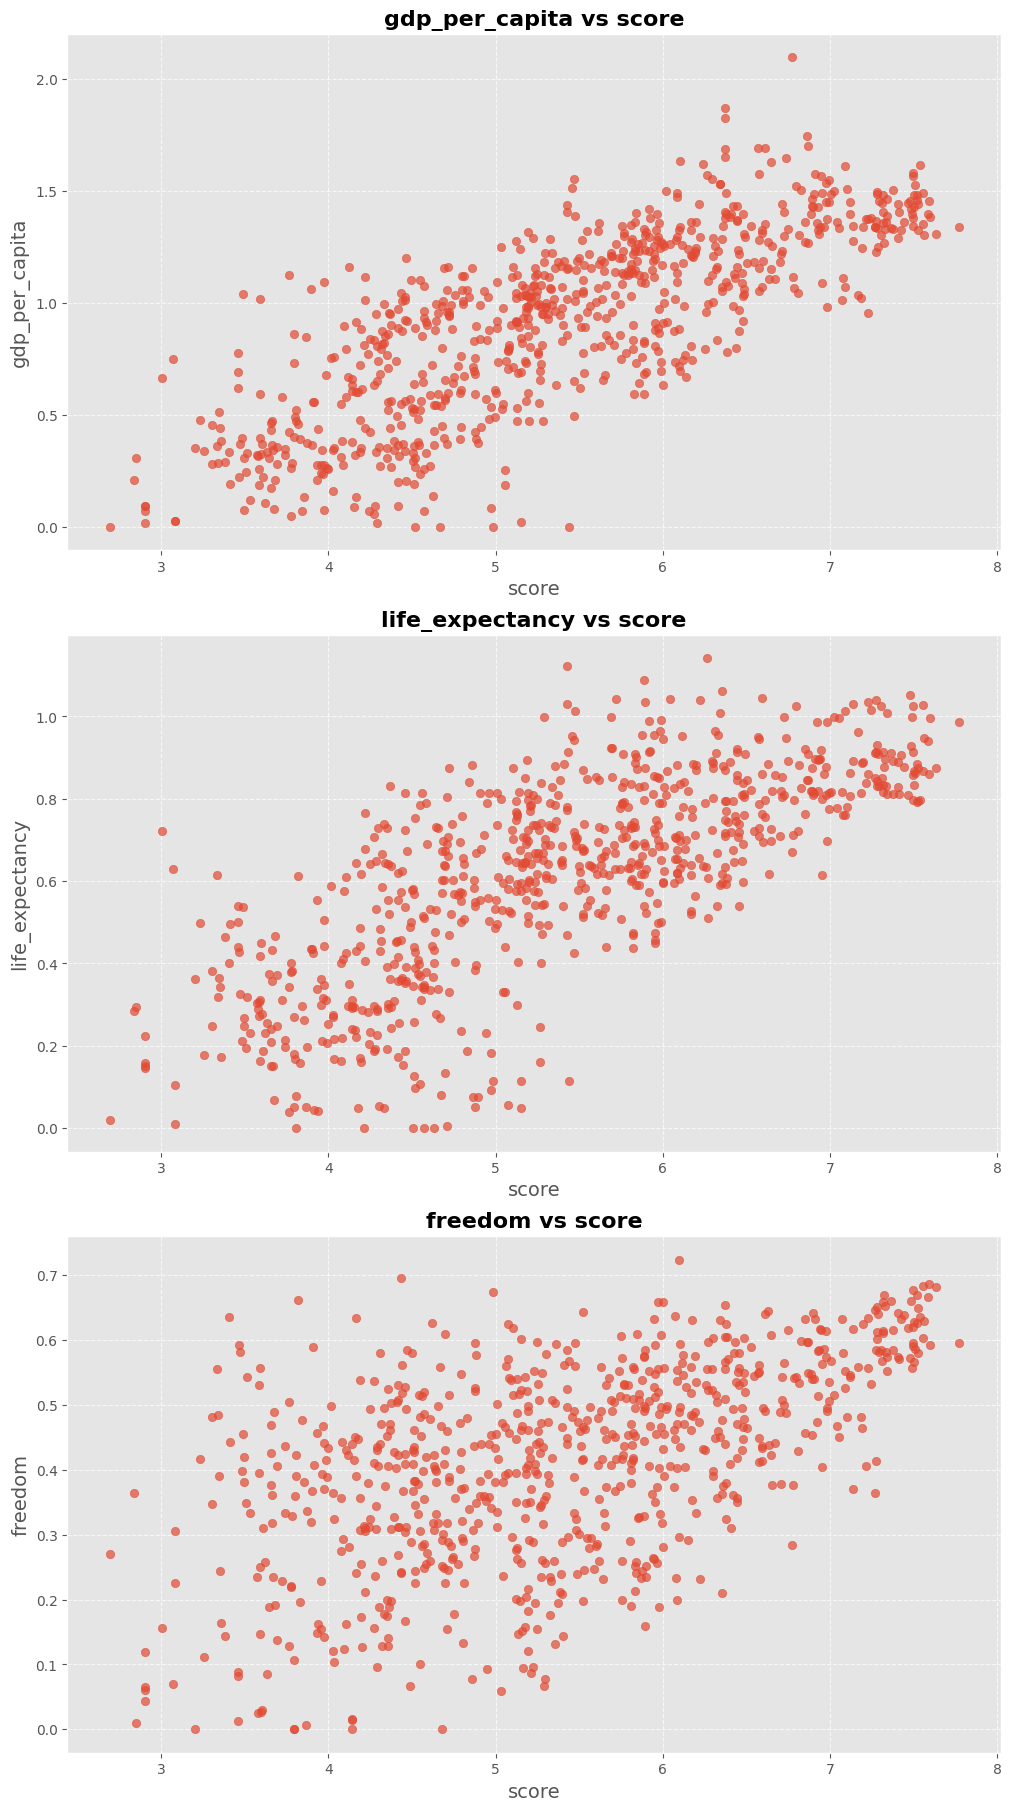

In [13]:
df = pd.read_csv(file_path)

# Mostrar las primeras filas y nombres de columnas para revisar el archivo
print("Columnas disponibles en el archivo:")
print(df.columns)
print(df.head(2))

# Crear variables dummy para la columna 'region' si existe
if 'region' in df.columns:
    df = pd.get_dummies(df, columns=['region'], dtype=int)

# Eliminar columnas específicas, solo si existen en el DataFrame
columns_to_drop = ['country', 'overall_rank']
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

# Mostrar las primeras filas del DataFrame modificado
print(df.head(2))

# Variables para graficar
variables_to_plot = ['score', 'gdp_per_capita', 'life_expectancy', 'freedom']
# Asegurarse que todas las variables para graficar existen
variables_to_plot = [var for var in variables_to_plot if var in df.columns]

# Crear subplots si hay variables disponibles para graficar
if variables_to_plot:
    fig, axes = plt.subplots(nrows=len(variables_to_plot) - 1, ncols=1, figsize=(10, 6 * (len(variables_to_plot) - 1)), constrained_layout=True)

    # Graficar gráficos de dispersión
    for i in range(len(variables_to_plot) - 1):
        ax = axes[i]
        x_var = variables_to_plot[0]  # 'score'
        y_var = variables_to_plot[i + 1]
        ax.scatter(df[x_var], df[y_var], alpha=0.7)
        ax.set_title(f'{y_var} vs {x_var}', fontsize=16, fontweight='bold')
        ax.set_xlabel(x_var, fontsize=14)
        ax.set_ylabel(y_var, fontsize=14)
        ax.grid(True, linestyle='--', alpha=0.7)

    # Mostrar los gráficos de dispersión
    plt.show()
else:
    print("No hay suficientes variables para graficar.")

# 📊 Análisis y Preparación de Datos

📂 **Carga y Limpieza de Datos:**
- Cargamos un archivo CSV y eliminamos columnas con muchos valores faltantes o que tienen baja correlación con la columna 'score'.

🔍 **Manejo de Valores Faltantes:**
- Calculamos la mediana para la columna 'government_corruption' y rellenamos los valores faltantes con este valor.

🎯 **Definición de Variables para el Modelo:**
- Definimos las variables independientes `X` (excluyendo 'score', 'country', y 'rank') y la variable dependiente `y` ('score').

📈 **Extensión de Características con Transformación Polinómica:**
- Aplicamos una transformación polinómica de grado 2 a las variables independientes para capturar interacciones entre ellas, potencialmente mejorando el modelo.

🔄 **División de Datos en Conjuntos de Entrenamiento y Prueba:**
- Dividimos los datos en un 70% para entrenamiento y un 30% para prueba, preparándolos para el modelado.

🔧 **Optimización de Hiperparámetros mediante Randomized Search:**
- Configuramos y ejecutamos un `RandomizedSearchCV` con `RandomForestRegressor` para encontrar la mejor combinación de hiperparámetros mediante iteraciones aleatorias.

🏆 **Evaluación y Resultados del Modelo:**
- Utilizamos el mejor modelo para predecir en el conjunto de prueba y evaluamos su rendimiento mediante el cálculo del error cuadrático medio (MSE) y el coeficiente de determinación (R²), ofreciendo una medida de la calidad de las predicciones.

In [14]:
data = pd.read_csv(file_path)

# Eliminar columnas con muchos valores faltantes y baja correlación con 'score'
columns_to_drop = [
    'dystopia_residual', 'family', 'lower_confidence_interval', 'upper_confidence_interval',
    'whiskerhigh', 'whiskerlow', 'standard_error', 'region', 'social_support'
]
data_cleaned = data.drop(columns=columns_to_drop)

# Manejar valores faltantes para 'government_corruption' rellenando con la mediana
median_value = data_cleaned['government_corruption'].median()
data_cleaned['government_corruption'] = data_cleaned['government_corruption'].fillna(median_value)

# Definir las características y la variable objetivo
X = data_cleaned.drop(['score', 'country', 'rank'], axis=1)
y = data_cleaned['score']

# Crear características polinómicas
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=42)

# Especificar los parámetros y distribuciones a probar
param_dist = {
    'n_estimators': randint(100, 200),
    'max_features': ['sqrt', 'log2'],
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'bootstrap': [True, False]
}

# Inicializar el RandomizedSearchCV con un número de iteraciones y más divisiones de CV
random_search = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_distributions=param_dist, n_iter=200, cv=10, verbose=2, random_state=42, n_jobs=-1)

# Ajustar el modelo con características polinómicas
random_search.fit(X_train_poly, y_train)

# Mejor modelo encontrado
best_model = random_search.best_estimator_

# Predecir los puntajes de felicidad en el conjunto de prueba con características polinómicas
y_pred_poly = best_model.predict(X_test_poly)

# Calcular el MSE y R^2 optimizados con características polinómicas
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# Imprimir MSE y R^2 optimizados
print("Polynomial Features Optimized MSE:", mse_poly)
print("Polynomial Features Optimized R^2:", r2_poly)


Fitting 10 folds for each of 200 candidates, totalling 2000 fits
Polynomial Features Optimized MSE: 0.2423722592444289
Polynomial Features Optimized R^2: 0.8058778695277203


## 📉 Visualización de Predicciones y Evaluación del Modelo

🔵 **Gráfico de Dispersión para Comparar Valores Reales con Predichos:**
- Generamos un gráfico de dispersión donde cada punto representa un valor real vs. un valor predicho.
- Dibujamos una línea punteada que indica dónde los valores predichos coincidirían perfectamente con los valores reales.

📊 **Gráfico de Barras de las Diferencias:**
- Calculamos las diferencias entre los valores reales y los valores predichos.
- Mostramos estas diferencias en un gráfico de barras, lo que nos permite ver rápidamente dónde y cuánto se desviaron las predicciones de los valores reales.

🖼️ **Visualización de Gráficos:**
- Finalmente, mostramos los gráficos para proporcionar una representación visual clara de la eficacia del modelo y las áreas de posible mejora.


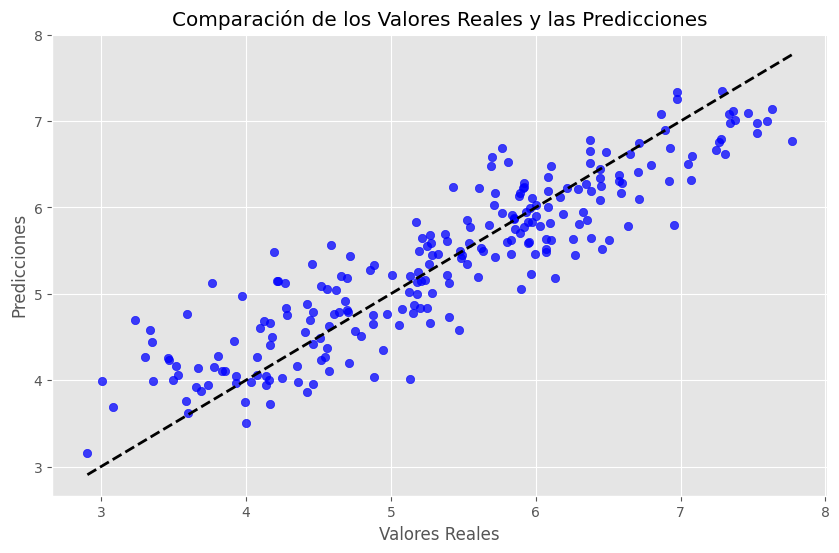

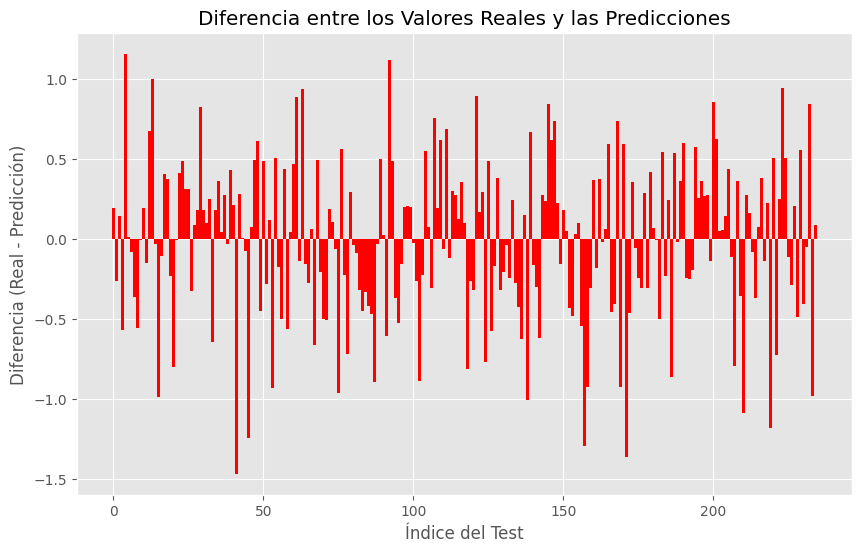

In [15]:
y_pred = y_pred_poly 
# Generar un gráfico para comparar los valores reales con los predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.75, color='blue')  # Puntos de predicciones
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Línea de perfecta predicción
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación de los Valores Reales y las Predicciones')
plt.grid(True)

# Mostrar la diferencia en otro gráfico
plt.figure(figsize=(10, 6))
differences = y_test - y_pred
indices = np.arange(len(differences))
plt.bar(indices, differences, color='red')
plt.xlabel('Índice del Test')
plt.ylabel('Diferencia (Real - Predicción)')
plt.title('Diferencia entre los Valores Reales y las Predicciones')
plt.grid(True)

# Mostrar los gráficos
plt.show()

## 📊 Análisis Visual de los Resultados del Modelo

🎯 **Primera Gráfica: Comparación de Valores Reales vs. Predicciones**
- Usamos un gráfico de dispersión para comparar los valores reales con los predichos, donde los puntos azules representan las predicciones.
- Una línea negra discontinua representa la predicción ideal donde los valores reales y predichos son iguales.

📉 **Segunda Gráfica: Diferencias entre Valores Reales y Predicciones**
- Mostramos las diferencias entre los valores reales y las predicciones en un gráfico de barras rojas para identificar rápidamente las desviaciones.

📊 **Tercera Gráfica: Histograma de las Predicciones**
- Visualizamos la distribución de las predicciones usando un histograma, ayudando a entender la dispersión y la frecuencia de los valores predichos.

🌟 **Cuarta Gráfica: Histograma de los Valores Reales**
- Similar al histograma de predicciones, pero enfocado en los valores reales para comparar si las predicciones siguen una distribución similar.

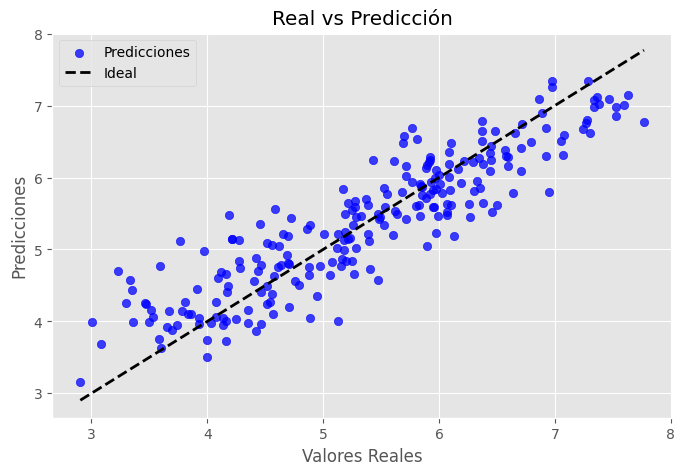

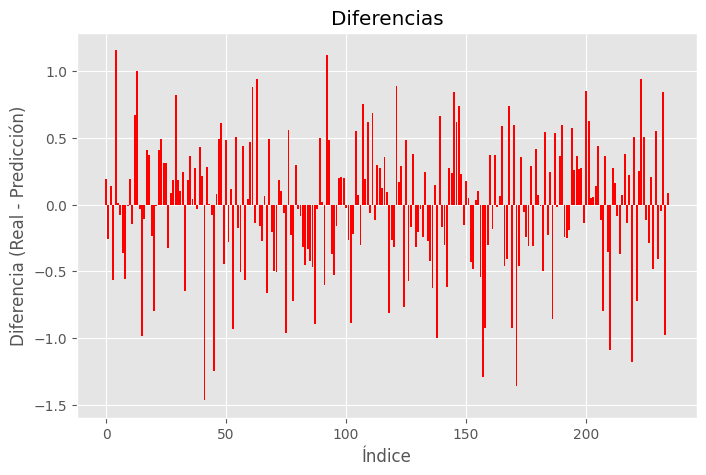

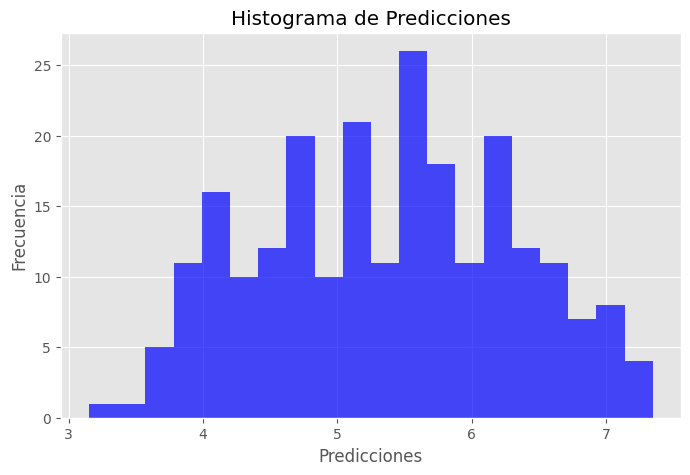

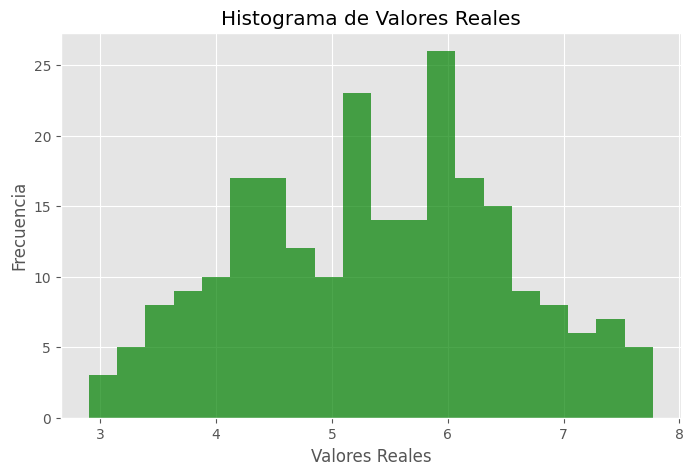

In [16]:
# Primera Gráfica: Valores Reales vs Predicciones
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.75, color='blue', label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Real vs Predicción')
plt.legend()
plt.grid(True)
plt.show()

# Segunda Gráfica: Diferencias entre Valores Reales y Predicciones
differences = y_test - y_pred
indices = np.arange(len(differences))
plt.figure(figsize=(8, 5))
plt.bar(indices, differences, color='red')
plt.xlabel('Índice')
plt.ylabel('Diferencia (Real - Predicción)')
plt.title('Diferencias')
plt.grid(True)
plt.show()

# Tercera Gráfica: Histograma de las Predicciones
plt.figure(figsize=(8, 5))
plt.hist(y_pred, bins=20, color='blue', alpha=0.7)
plt.xlabel('Predicciones')
plt.ylabel('Frecuencia')
plt.title('Histograma de Predicciones')
plt.grid(True)
plt.show()

# Cuarta Gráfica: Histograma de los Valores Reales
plt.figure(figsize=(8, 5))
plt.hist(y_test, bins=20, color='green', alpha=0.7)
plt.xlabel('Valores Reales')
plt.ylabel('Frecuencia')
plt.title('Histograma de Valores Reales')
plt.grid(True)
plt.show()


# 🛠️🚀 **Configuración y Envío de Predicciones con Kafka**

📂 **Cargar los datos:** Primero, cargamos los datos desde un archivo CSV.

🧹 **Eliminar columnas innecesarias:** Eliminamos aquellas columnas que tienen muchos valores faltantes o que no están fuertemente relacionadas con la variable de interés, que en este caso es el puntaje de felicidad.

🛠️ **Manejar valores faltantes:** Para la columna 'government_corruption', rellenamos los valores faltantes con la mediana de esa columna.

🎯 **Definir características y variable objetivo:** Separamos el conjunto de datos en características (variables predictoras) y la variable objetivo (el puntaje de felicidad).

🔢 **Crear características polinómicas:** Generamos nuevas características polinómicas a partir de las existentes para capturar relaciones más complejas en los datos.

🔀 **Dividir los datos:** Dividimos los datos en conjuntos de entrenamiento (70%) y prueba (30%) para evaluar el rendimiento del modelo.

🛠️ **Especificar parámetros para búsqueda:** Definimos los parámetros y sus posibles valores para el modelo de Random Forest, que se ajustarán mediante una búsqueda aleatoria.

🔍 **Inicializar RandomizedSearchCV:** Utilizamos RandomizedSearchCV para buscar los mejores parámetros del modelo de Random Forest. Este proceso incluye varias iteraciones y validaciones cruzadas.

⚙️ **Ajustar el modelo:** Entrenamos el modelo utilizando las características polinómicas y los parámetros óptimos encontrados.

🌟 **Mejor modelo:** Identificamos el mejor modelo resultante de la búsqueda aleatoria.

🔮 **Predecir puntajes:** Utilizamos el mejor modelo para predecir los puntajes de felicidad en el conjunto de prueba.

📉 **Calcular métricas:** Calculamos el Error Cuadrático Medio (MSE) y el Coeficiente de Determinación (R²) para evaluar el rendimiento del modelo con las características polinómicas.

🖨️ **Imprimir métricas:** Mostramos los valores del MSE y R² optimizados.

🛠️ **Configurar productor de Kafka:** Configuramos un productor de Kafka para enviar las predicciones generadas.

🚀 **Enviar predicciones a Kafka:** Enviamos cada predicción, una por una, a Kafka para su procesamiento posterior.


In [17]:

# Cargar los datos
data = pd.read_csv(file_path)

# Eliminar columnas con muchos valores faltantes y baja correlación con 'score'
columns_to_drop = [
    'dystopia_residual', 'family', 'lower_confidence_interval', 'upper_confidence_interval',
    'whiskerhigh', 'whiskerlow', 'standard_error', 'region', 'social_support'
]
data_cleaned = data.drop(columns=columns_to_drop)

# Manejar valores faltantes para 'government_corruption' rellenando con la mediana
median_value = data_cleaned['government_corruption'].median()
data_cleaned['government_corruption'] = data_cleaned['government_corruption'].fillna(median_value)

# Definir las características y la variable objetivo
X = data_cleaned.drop(['score', 'country', 'rank'], axis=1)
y = data_cleaned['score']

# Crear características polinómicas
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=42)

# Especificar los parámetros y distribuciones a probar
param_dist = {
    'n_estimators': randint(100, 200),
    'max_features': ['sqrt', 'log2'],
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'bootstrap': [True, False]
}

# Inicializar el RandomizedSearchCV con un número de iteraciones y más divisiones de CV
random_search = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_distributions=param_dist, n_iter=200, cv=10, verbose=2, random_state=42, n_jobs=-1)

# Ajustar el modelo con características polinómicas
random_search.fit(X_train_poly, y_train)

# Mejor modelo encontrado
best_model = random_search.best_estimator_

# Predecir los puntajes de felicidad en el conjunto de prueba con características polinómicas
y_pred_poly = best_model.predict(X_test_poly)

# Calcular el MSE y R^2 optimizados con características polinómicas
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# Imprimir MSE y R^2 optimizados
print("Polynomial Features Optimized MSE:", mse_poly)
print("Polynomial Features Optimized R^2:", r2_poly)

# Configurar el productor de Kafka
producer = KafkaProducer(
    bootstrap_servers=['localhost:9092'],
    value_serializer=lambda v: json.dumps(v).encode('utf-8')
)

# Enviar las predicciones una a una a Kafka
for i in range(len(X_test_poly)):
    data = {
        'features': X_test_poly[i].tolist(),
        'predicted_happiness_score': y_pred_poly[i]
    }
    producer.send('happiness_predictions', value=data)

producer.flush()
print("Todas las predicciones han sido enviadas a Kafka.")


Fitting 10 folds for each of 200 candidates, totalling 2000 fits
Polynomial Features Optimized MSE: 0.2423722592444289
Polynomial Features Optimized R^2: 0.8058778695277203
Todas las predicciones han sido enviadas a Kafka.


## 📁 Guardar el Modelo Entrenado

📁 **Abrir archivo:** Abrimos un archivo en modo escritura binaria para guardar el modelo entrenado.

🔒 **Guardar modelo:** Utilizamos `pickle` para guardar el mejor modelo en el archivo especificado.

💾 **Confirmar guardado:** Imprimimos un mensaje confirmando que el modelo ha sido guardado exitosamente en el archivo indicado.


In [18]:
with open(model_filename, 'wb') as file:
    pickle.dump(best_model, file)

print(f'Modelo guardado en {model_filename}')


Modelo guardado en C:\Users\cesar\Desktop\platzi\ETL_Workshop_03\DATA_PKL\happiness_score_model.pkl


## 🛠️ Configurar el consumidor de Kafka

🛠️ **Configurar el consumidor de Kafka:** Configuramos un consumidor de Kafka para leer mensajes del tópico 'happiness_predictions'.

🔄 **Leer y mostrar los primeros 100 mensajes del tópico:** Leemos los mensajes del tópico de Kafka y mostramos el contenido de cada mensaje hasta alcanzar los primeros 100 mensajes. Luego, detenemos el proceso.


In [19]:
# Configurar el consumidor de Kafka
consumer = KafkaConsumer(
    'happiness_predictions',
    bootstrap_servers=['localhost:9092'],
    auto_offset_reset='earliest',
    value_deserializer=lambda x: json.loads(x.decode('utf-8'))
)

# Leer y mostrar los primeros 100 mensajes del tópico
for count, message in enumerate(consumer, start=1):
    if count <= 100:
        print(message.value)
    else:
        break


{'features': [0.452, 0.308, 0.22, 0.146, 0.391, 0.204304, 0.139216, 0.09944, 0.065992, 0.176732, 0.094864, 0.06776, 0.044967999999999994, 0.12042800000000001, 0.0484, 0.032119999999999996, 0.08602, 0.021315999999999998, 0.057086, 0.15288100000000002], 'predicted_happiness_score': 4.158623053040118}
{'features': [0.519, 0.874, 0.051, 0.064, 0.365, 0.269361, 0.453606, 0.026469, 0.033216, 0.189435, 0.763876, 0.044573999999999996, 0.055936, 0.31901, 0.0026009999999999996, 0.003264, 0.018615, 0.004096, 0.02336, 0.13322499999999998], 'predicted_happiness_score': 4.70042011321435}
{'features': [0.4027, 0.97306, 0.10074, 0.18037, 0.68613, 0.16216729, 0.39185126200000003, 0.040567998, 0.072634999, 0.276304551, 0.9468457636000001, 0.0980260644, 0.17551083220000002, 0.6676456578000001, 0.010148547599999998, 0.0181704738, 0.0691207362, 0.0325333369, 0.1237572681, 0.4707743769], 'predicted_happiness_score': 5.833940403862528}
{'features': [0.28098, 1.15851, 0.06244, 0.09314, 0.3494, 0.0789497604, 0